In [4]:
import warnings
warnings.filterwarnings('ignore')

Optimization started
chiSqr: 4218.292226314339, N accepted: 0 / 0
chiSqr: 4218.292226314339, N accepted: 0 / 1
chiSqr: 145.59208822416386, N accepted: 328 / 1001
chiSqr: 9.43600895423131, N accepted: 498 / 2001
chiSqr: 1.5414954854810938, N accepted: 577 / 3001
Final chiSqr: 0.984314631822739, N accepted: 602


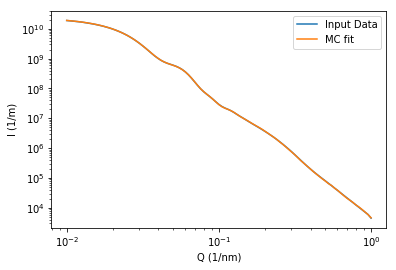

In [5]:
import sys, os
# set the location where the sasview-sasmodels are installed:
sys.path.append(os.path.join(os.getcwd(), "..", "sasmodels"))
import sasmodels
import sasmodels.core
import sasmodels.direct_model
model = sasmodels.core.load_model('sphere', dtype = "fast")
from mcsas3 import mcmodel, mcopt, mccore

# import data
from pandas import read_csv
qs = read_csv("quickstartdemo1.csv", delimiter = ';',
              header = None, names = ["Q", "I", "ISigma"])
# Q needs to be in a list as in [Q] or [Qx,Qy]
# measured intensity I (same shape as Q) and uncertainties ISigma
measData = dict(Q = [qs.Q.values], I = qs.I.values,
                ISigma = qs.ISigma.values)

# initialize optimization settings
mcopt = mcopt.McOpt(nContrib = 300, maxIter = 1e5,
                    convCrit = 1., nRep = 10)
# create a model
mcmod = mcmodel.McModel(func = model, seed = 12,
            fitParameterLimits = {"radius": (3, 315)}, 
            staticParameters = {"background": 0,
                                "sld" : 1e+6, "sld_solvent" : 0, })
mc = mccore.McCore(measData, model = mcmod, opt = mcopt)
mc.optimize()
mc._model.kernel.release()
print("Final chiSqr: {}, N accepted: {}"
      .format(mc._opt.gof, mc._opt.accepted))

# storing the results
mc._ofname = "results.h5"
mc._opt.repetition = 0
mc.store()
# plotting the intensity match
import matplotlib
import matplotlib.pyplot as plt
plt.plot(measData["Q"][0], measData["I"], label = "Input Data")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Q (1/nm)")
plt.ylabel("I (1/m)")
plt.plot(measData["Q"][0],mc._opt.modelI*mc._opt.x0[0]+mc._opt.x0[1],
         label = "MC fit")
_ = plt.legend(loc = 0)